# Data Cleaning and EDA

## Abstract

### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### CSV Read-in

In [2]:
df = pd.read_csv("../data/musicdata.csv")
df.head()

,artist_id,artist,album_id,album_names,track_id,track_number,track_title,track_duration,track_disc_number,danceability,energy,key,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,1L0y9srZMyh9XUnYGv37IP,'Til Tuesday,67OxSfZotEq8cCa5SCeX5r,Everything's Different Now,5n9QFM4EiMeLGO0Mbwaqov,1.0,Everything's Different Now,236733.0,1.0,0.672,0.455,10.0,1.0,0.0393,0.0693,0.000033,0.1080,0.730,123.777,4.0
1,1L0y9srZMyh9XUnYGv37IP,'Til Tuesday,67OxSfZotEq8cCa5SCeX5r,Everything's Different Now,0BKslA1XqG8HBUKBl4d7EN,2.0,Rip In Heaven,211200.0,1.0,0.612,0.615,4.0,1.0,0.0351,0.4280,0.000000,0.3470,0.815,131.809,4.0
2,1L0y9srZMyh9XUnYGv37IP,'Til Tuesday,67OxSfZotEq8cCa5SCeX5r,Everything's Different Now,5G7NBdQLHc7GkehNmLG3yJ,3.0,Why Must I,221000.0,1.0,0.586,0.670,1.0,1.0,0.0268,0.2290,0.000035,0.3230,0.838,96.486,4.0
3,1L0y9srZMyh9XUnYGv37IP,'Til Tuesday,67OxSfZotEq8cCa5SCeX5r,Everything's Different Now,0J6nZDgEuwXtECq8Pukn1n,4.0,J For Jules,265493.0,1.0,0.475,0.355,10.0,1.0,0.0308,0.4620,0.000001,0.1190,0.262,151.651,4.0
4,1L0y9srZMyh9XUnYGv37IP,'Til Tuesday,67OxSfZotEq8cCa5SCeX5r,Everything's Different Now,3Lm7hSTabr01oav0WdSsuD,5.0,(Believed You Were) Lucky,216973.0,1.0,0.612,0.523,5.0,1.0,0.0321,0.4480,0.000002,0.0727,0.495,124.315,4.0


In [3]:
df.shape

(98425, 20)

## Data Cleaning

Let's review our columns.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98425 entries, 0 to 98424
Data columns (total 20 columns):
artist_id            98341 non-null object
artist               98425 non-null object
album_id             98341 non-null object
album_names          98341 non-null object
track_id             98341 non-null object
track_number         98341 non-null float64
track_title          98341 non-null object
track_duration       98341 non-null float64
track_disc_number    98341 non-null float64
danceability         98338 non-null float64
energy               98338 non-null float64
key                  98338 non-null float64
mode                 98338 non-null float64
speechiness          98338 non-null float64
acousticness         98338 non-null float64
instrumentalness     98338 non-null float64
liveness             98338 non-null float64
valence              98337 non-null float64
tempo                98338 non-null float64
time_signature       98338 non-null float64
dtypes: float64(1

Nothing really out of the ordinary here, so our data is surprisingly neat already.

### Missing Values

In [5]:
df.isna().sum()

artist_id            84
artist                0
album_id             84
album_names          84
track_id             84
track_number         84
track_title          84
track_duration       84
track_disc_number    84
danceability         87
energy               87
key                  87
mode                 87
speechiness          87
acousticness         87
instrumentalness     87
liveness             87
valence              88
tempo                87
time_signature       87
dtype: int64

Noticing how every value seems to be very similar to other values, my intuition is these are artists that are not available on Spotify. While it is very likely there is some underlying pattern here for what would be signed with a streaming service and what would not, it also represents probably about $88$ rows of $98,425$.  I am curious about the row that is missing only valence. Other than that, while this could be an interesting missing pattern to explore, that feels more like its own project, and given their small makeup, I will likely end up just dropping these rows.

In [6]:
print(f"Dropping all the null rows would result in losing {df.shape[0] - df.dropna().shape[0]} songs.")

Dropping all the null rows would result in losing 88 songs.


Confirms earlier suspicions that these are artists who are missing from spotify.  After that, we have aritsts with profiles on the service but not offering any albums on the service.  Lastly, I want to check what song is missing its valence:

In [7]:
df[(df["valence"].isna()) & (df["tempo"].notna())]

,artist_id,artist,album_id,album_names,track_id,track_number,track_title,track_duration,track_disc_number,danceability,energy,key,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
73068,6QtGlUje9TIkLrgPZrESuk,Steve Miller Band,36G9sqbDXXbE7Mv9GTDMXd,Book Of Dreams,27AyeOoNoGue7zRyH4CR1I,8.0,Electro Lux Imbroglio,57466.0,1.0,0.175,0.00018,1.0,1.0,0.0605,0.0461,0.997,0.108,NaN,71.049,4.0


_Electro Lux Imbroglio_ by *The Steve Miller Band* is the culprit here.  The song in question is less a song and more a mortar for the album; acting mostly as an extended lead in for the next track.  It's about $57$ seconds of a sustained organ chord, with what I believe is a theramin tracing out a basic melody.  It makes sense that valence would be absent.  The key field, and to my not incredibly trained ear, suggests it is a C# Major chord.

In [8]:
df.dropna(inplace=True)
df.shape

(98337, 20)

Finally, we should relabel some columns and change how they are represented.

`mode` is a guess at if the song is mostly in a major or minor key, with $1$ being major.

In [11]:
df.rename({"mode" : "is_major"},inplace=True)

`instrumentalness` and `liveness`, while represented by a $[0,1]$ range of values, are softly categorical, with the former having $>0.5$ meaning likely instrumental, and the closer $1$ signifying more confidence. `liveness` similarly has a threshold at $0.8$, where values above that meaning an increase in confidence.

In [12]:
df["is_live"] = df.liveness.map(lambda x: x >= 0.8)
df["is_instrumental"] = df.instrumentalness.map(lambda x : x >= 0.5)

For exploration, I will keep it as a different column.

Key is written as the usual [pitch classes](https://en.wikipedia.org/wiki/Pitch_class#Other_ways_to_label_pitch_classes) notation, so it should be noted that while it is numerical here, it is a categorical definition under the hood.

In [19]:
key_notes = {-1.0: "key not detected"
             0.0: "C",
             1.0: "C#",
             2.0: "D",
             3.0: "D#",
             4.0: "E",
             5.0: "F",
             6.0: "F#",
             7.0: "G",
             8.0: "G#",
             9.0 :"A",
             10.0:"A#",
             11.0:"B"}

In [20]:
df["key_tone"] = df.key.map(key_notes)

In [18]:
df.key.value_counts(normalize=True).sort_index()

0.0     0.128355
1.0     0.072007
2.0     0.133063
3.0     0.025240
4.0     0.090475
5.0     0.067187
6.0     0.050856
7.0     0.128029
8.0     0.046127
9.0     0.130714
10.0    0.049310
11.0    0.078638
Name: key, dtype: float64

## Exploratory Data Analysis

In [10]:
df.time_signature.value_counts(normalize=True)

4.0    0.892553
3.0    0.083061
5.0    0.013657
1.0    0.008105
0.0    0.002624
Name: time_signature, dtype: float64

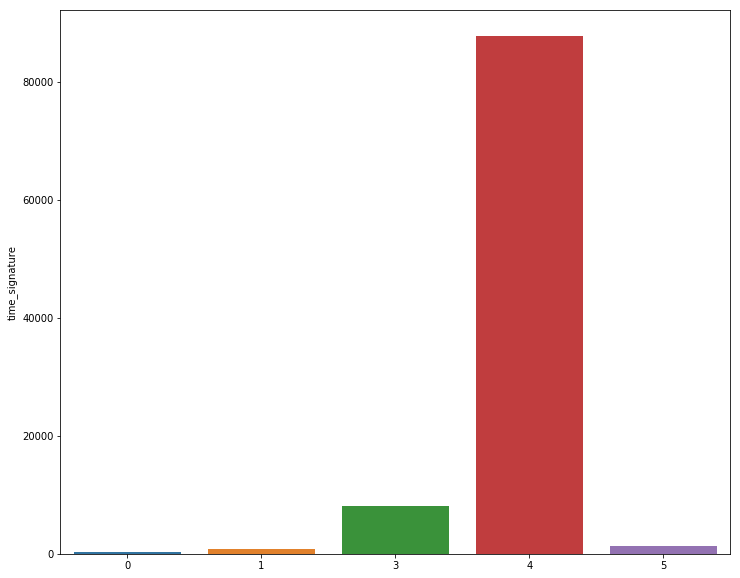

In [28]:
plt.figure(figsize=(12,10))
sns.barplot(x=[4,3,5,1,0], y=df.time_signature.value_counts())

Time signature is best guess at how many beats per measure, usually thought of as the numerator of a time signature.

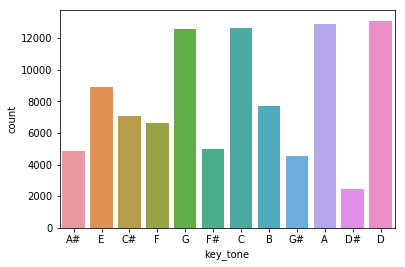

In [42]:
sns.countplot(df.key_tone)